## Time Series Regression - arima


In [1]:
# DAL Library
# version 1.0.50

source("https://raw.githubusercontent.com/cefet-rj-dal/dal/main/examples/jupyter_daltoolbox.R")

#loading DAL
load_daltoolbox() 

Warning message:
“replacing previous import ‘dplyr::rename’ by ‘reshape::rename’ when loading ‘daltoolbox’”
Warning message:
“replacing previous import ‘class::condense’ by ‘reshape::condense’ when loading ‘daltoolbox’”
Warning message:
“replacing previous import ‘dplyr::filter’ by ‘stats::filter’ when loading ‘daltoolbox’”


### Cosine series for studying

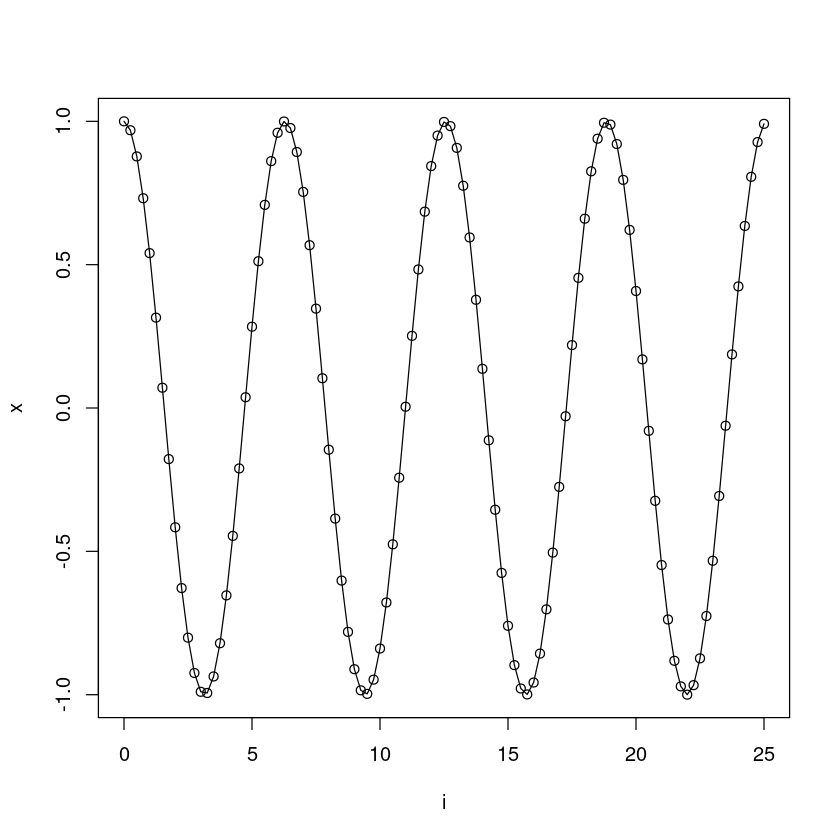

In [2]:
i <- seq(0, 25, 0.25)
x <- cos(i)

plot(i, x)
lines(i, x)

### sliding windows 
for ARIMA should be 0

In [3]:
sw_size <- 0
ts <- ts_data(x, 0)
tshead(ts, 3)

t0
1.0000000
0.9689124
0.8775826


### data sampling

In [4]:
test_size <- 1
samp <- ts_sample(ts, test_size)
tshead(samp$train, 3)
tshead(samp$test)

t0
1.0000000
0.9689124
0.8775826


t0
0.9912028


### Model training

In [5]:
model <- tsreg_arima()

io_train <- ts_projection(samp$train)
model <- fit(model, x=io_train$input, y=io_train$output)

print(describe(model))

tsreg_arima,0.002



[1] "tsreg_arima"


### Evaluation of adjustment

In [6]:
adjust <- predict(model, io_train$input)
ev_adjust <- evaluate(model, io_train$output, adjust)
print(head(ev_adjust$metrics))

         mse     smape
1 0.03120413 0.4967116


### Prediction of test

In [7]:
steps_ahead <- 1
io_test <- ts_projection(samp$test)
prediction <- predict(model, x=io_test$input, steps_ahead=steps_ahead)
prediction <- as.vector(prediction)

output <- as.vector(io_test$output)
if (steps_ahead > 1)
    output <- output[1:steps_ahead]

print(sprintf("%.2f, %.2f", output, prediction))

[1] "0.99, 0.90"


### Evaluation of test data

In [8]:
ev_test <- evaluate(model, output, prediction)
print(head(ev_test$metrics))
print(sprintf("%s: smape: %.2f", describe(model), 100*ev_test$metrics$smape))

          mse      smape
1 0.007635648 0.09222281
[1] "tsreg_arima: smape: 9.22"


### Plot results

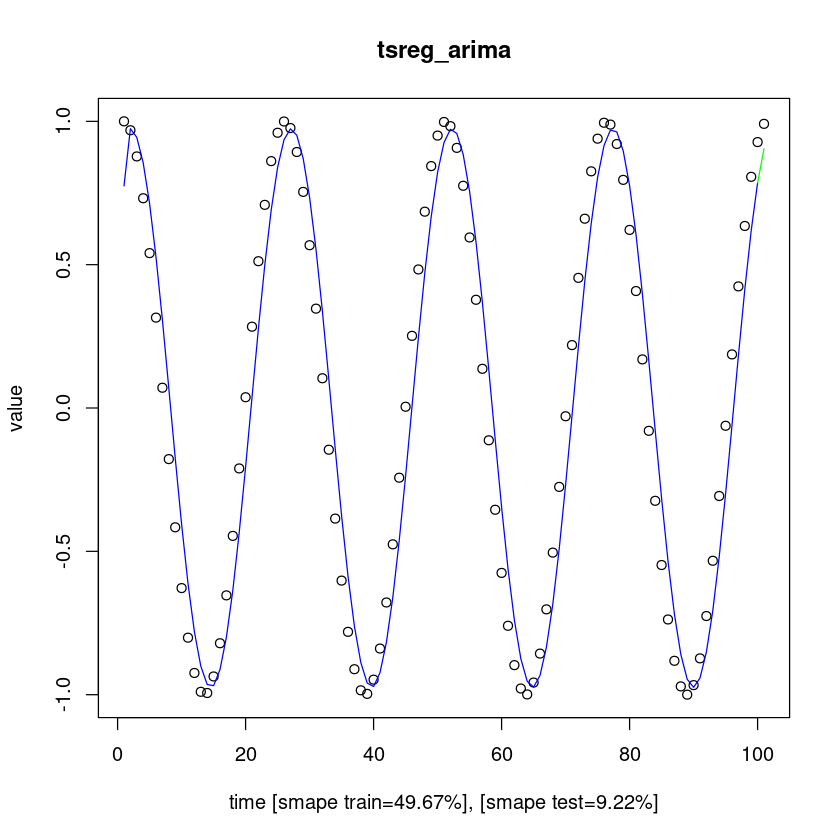

In [9]:
yvalues <- c(io_train$output, io_test$output)
tsplot(model, y=yvalues, yadj=adjust, ypre=prediction)